In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [32]:
df_loan = pd.read_csv(r"C:\Users\nguye\Downloads\doancoso\thucnghiem,\loan_data.csv")
df_loan

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,debt_consolidation,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1
37062,1,debt_consolidation,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1
37063,1,small_business,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1
37064,1,debt_consolidation,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1


In [33]:
df_loan.dropna(inplace=True)


In [34]:
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid


not_fully_paid
1    26775
0    10145
Name: count, dtype: int64


<Axes: xlabel='not_fully_paid'>

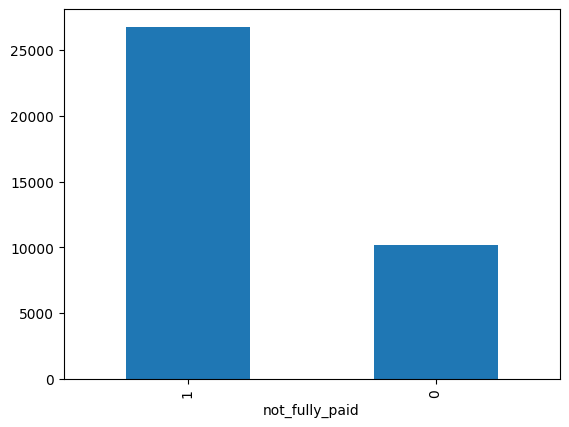

In [35]:
# Thống kê khoản vay có hoàn trả hay không.
  # 0: khoản vay không được hoàn trả dầy đủ
  # 1: khoản vay được hoàn trả đày đủ

print(df_loan["not_fully_paid"].value_counts())
df_loan["not_fully_paid"].value_counts().plot(kind="bar")

# Dữ liệu imbalance nặng -> cần xử lý -> sẽ xử lý sau

In [36]:
# Tìm các field là Object/ String -> chỉ có cột Purpose -> Xử lý cột này bằng OneHot
object_cols = [f for f in df_loan.columns if df_loan[f].dtype =="O"]
print(object_cols)

['purpose']


In [37]:
# Tìm hiểu qua về cột này
df_loan['purpose'].value_counts()

# Dễ thấy đa số là debt_consolidation -> Có 2 cách
# - Để nguyên và thực hiện onehot
# - Gom lại debt_cosolidation và Others
# -> Mình sẽ thử cách 2

purpose
debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: count, dtype: int64

In [38]:
def process_purpose(x):
  if x == "debt_consolidation":
    return 1
  else:
    return 0

df_loan['purpose_int'] = df_loan['purpose'].apply(process_purpose)

In [39]:
df_loan['purpose_int'].value_counts() # -> chỉ còn 2 giá trị

purpose_int
1    19516
0    17404
Name: count, dtype: int64

In [40]:
# Drop purpose và view lại
df_loan.drop(columns=["purpose"], inplace=True)
df_loan

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,1,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,1,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,1,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,1,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,1,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,1,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


In [41]:
# Check cột credit_policy -> toàn 1 -> drop
df_loan["credit_policy"].value_counts()

credit_policy
1    36920
Name: count, dtype: int64

In [42]:
# Drop credit_policy và view lại
df_loan.drop(columns=["credit_policy"], inplace=True)
df_loan

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


In [43]:
corr = df_loan.corr()
corr.style.background_gradient(cmap='coolwarm')

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
int_rate,1.000000,0.042739,-0.055919,0.116065,-0.456244,0.086726,0.021824,0.133468,-0.003504,0.172759,0.046075,-0.036599,0.097478
installment,0.042739,1.000000,0.227242,0.084286,0.022387,-0.125390,0.170643,0.028539,0.226005,0.046695,-0.049956,-0.013016,0.140044
log_annual_inc,-0.055919,0.227242,1.000000,-0.121779,0.020853,-0.119594,0.151355,0.044720,0.177392,0.029868,-0.034424,-0.037026,-0.002927
dti,0.116065,0.084286,-0.121779,1.000000,-0.013244,-0.044598,0.077765,0.000342,0.081434,0.032497,-0.010775,-0.031361,0.054696
fico,-0.456244,0.022387,0.020853,-0.013244,1.000000,-0.120728,-0.021722,-0.188516,-0.065700,-0.307689,-0.191167,-0.027124,-0.024893
days_with_cr_line,0.086726,-0.125390,-0.119594,-0.044598,-0.120728,1.000000,-0.066180,-0.068710,-0.187349,-0.052515,-0.006409,-0.038029,-0.006357
revol_bal,0.021824,0.170643,0.151355,0.077765,-0.021722,-0.066180,1.000000,0.128898,-0.203446,-0.146972,-0.067585,-0.356469,0.029699
revol_util,0.133468,0.028539,0.044720,0.000342,-0.188516,-0.068710,0.128898,1.000000,-0.061745,-0.014098,-0.052424,-0.086816,0.004182
inq_last_6mths,-0.003504,0.226005,0.177392,0.081434,-0.065700,-0.187349,-0.203446,-0.061745,1.000000,0.220876,-0.056046,0.219629,-0.007000
delinq_2yrs,0.172759,0.046695,0.029868,0.032497,-0.307689,-0.052515,-0.146972,-0.014098,0.220876,1.000000,-0.030163,0.135084,0.007397


C:\Users\nguye\AppData\Local\Temp\ipykernel_19632\3267232118.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  int_rate_default = df_plot.groupby("int_rate_bin")["not_fully_paid"].mean().reset_index()
C:\Users\nguye\AppData\Local\Temp\ipykernel_19632\3267232118.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  int_rate_default["mid"] = df_plot.groupby("int_rate_bin")["int_rate"].median().values
C:\Users\nguye\AppData\Local\Temp\ipykernel_19632\3267232118.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

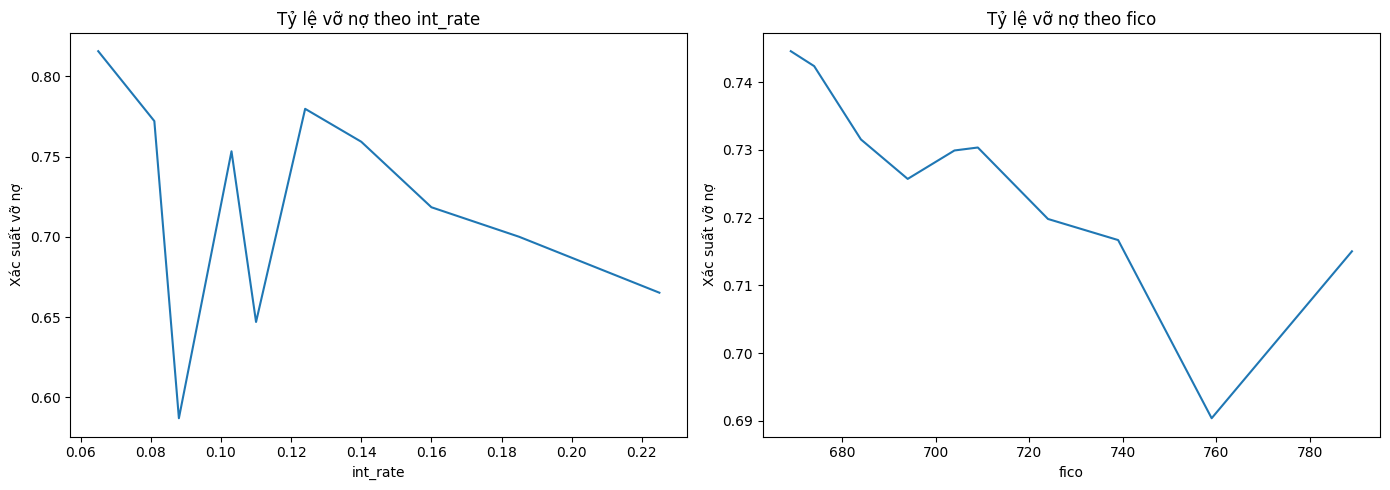

In [44]:


df_plot = df_loan.copy()
df_plot = df_plot.dropna(subset=["int_rate", "fico", "not_fully_paid"])

# Nhóm theo int_rate
df_plot["int_rate_bin"] = pd.qcut(df_plot["int_rate"], q=10)
int_rate_default = df_plot.groupby("int_rate_bin")["not_fully_paid"].mean().reset_index()
int_rate_default["mid"] = df_plot.groupby("int_rate_bin")["int_rate"].median().values

# Nhóm theo fico
df_plot["fico_bin"] = pd.qcut(df_plot["fico"], q=10)
fico_default = df_plot.groupby("fico_bin")["not_fully_paid"].mean().reset_index()
fico_default["mid"] = df_plot.groupby("fico_bin")["fico"].median().values

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(data=int_rate_default, x="mid", y="not_fully_paid", ax=ax[0])
ax[0].set_title("Tỷ lệ vỡ nợ theo int_rate")
ax[0].set_xlabel("int_rate")
ax[0].set_ylabel("Xác suất vỡ nợ")

sns.lineplot(data=fico_default, x="mid", y="not_fully_paid", ax=ax[1])
ax[1].set_title("Tỷ lệ vỡ nợ theo fico")
ax[1].set_xlabel("fico")
ax[1].set_ylabel("Xác suất vỡ nợ")

plt.tight_layout()
plt.show()



In [1]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = df_loan.drop(columns=["not_fully_paid"]).columns.values

# Perform feature selection
selector = SelectKBest(f_classif, k=5) # Chọn 
selector.fit(df_loan[predictors], df_loan["not_fully_paid"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()



NameError: name 'df_loan' is not defined

In [84]:
#kiểm tra lại các cột đã chọn
df_loan.columns.values



array(['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'not_fully_paid', 'purpose_int'],
      dtype=object)

In [88]:

# Scale dữ liệu
X = df_loan[predictors]
y = df_loan["not_fully_paid"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[predictors])
X[predictors] = scaler.transform(X[predictors])

X

C:\Users\nguye\AppData\Local\Temp\ipykernel_19632\2393613608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[predictors] = scaler.transform(X[predictors])


,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
0,0.352941,0.285030,0.016129,0.015716,0.161290,0.760027,0.039118,0.029304,0.000005,0.333333,0.0,0.0
1,0.223529,0.511634,0.005914,0.030160,0.376344,0.666667,0.023568,0.020696,0.000003,0.066667,0.0,0.0
2,0.137255,0.459866,0.017742,0.016126,0.161290,0.687403,0.040966,0.024652,0.000000,0.000000,0.0,0.0
3,0.458824,0.155066,0.004301,0.032102,0.430108,0.877044,0.016865,0.009826,0.000003,0.000000,0.0,0.0
4,0.137255,0.329176,0.003871,0.023754,0.268817,0.794100,0.014965,0.011130,0.000002,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.137255,0.464417,0.017957,0.024685,0.161290,0.761488,0.000000,0.000000,0.039809,0.045333,0.0,1.0
37062,0.196078,0.503171,0.013441,0.011742,0.430108,0.447479,0.000000,0.000000,0.002647,0.002200,0.0,1.0
37063,0.498039,0.491626,0.008065,0.009029,0.161290,0.906688,0.000006,0.000000,0.000974,0.002533,0.0,0.0
37064,0.223529,0.260740,0.003449,0.058178,0.618280,0.841511,0.000000,0.000000,0.023003,0.019267,0.0,1.0


In [50]:
# Split dữ liệu train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
# Hiển thị thử X_train
X_train.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
24635,0.729412,0.505840,0.013441,0.017107,0.053763,0.697771,0.000000,0.086957,0.018102,0.051333,0.2,1.0
22808,0.266667,0.386884,0.009247,0.003403,0.403226,0.705218,0.000002,0.000000,0.017255,0.043933,0.0,0.0
16378,0.400000,0.236607,0.004839,0.017828,0.080645,0.848958,0.000000,0.000000,0.012404,0.046133,0.0,1.0
25975,0.266667,0.144526,0.005376,0.016697,0.188172,0.832603,0.000006,0.000000,0.014905,0.028933,0.0,0.0
16426,0.086275,0.246575,0.017742,0.004795,0.456989,0.813376,0.000000,0.000000,0.005965,0.011467,0.2,0.0


In [52]:
# Upsampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [28]:
# Check xem balance chưa
y_train_resample.value_counts()

not_fully_paid
1    21484
0    21484
Name: count, dtype: int64

In [53]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(X_train_resample, y_train_resample)
y_pred_log = model_log.predict(X_test)

# In ra du lieu
print(classification_report(y_test, y_pred_log))



              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2093
           1       0.87      0.87      0.87      5291

    accuracy                           0.82      7384
   macro avg       0.78      0.78      0.78      7384
weighted avg       0.82      0.82      0.82      7384



              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2093
           1       0.88      0.90      0.89      5291

    accuracy                           0.85      7384
   macro avg       0.81      0.80      0.81      7384
weighted avg       0.84      0.85      0.85      7384



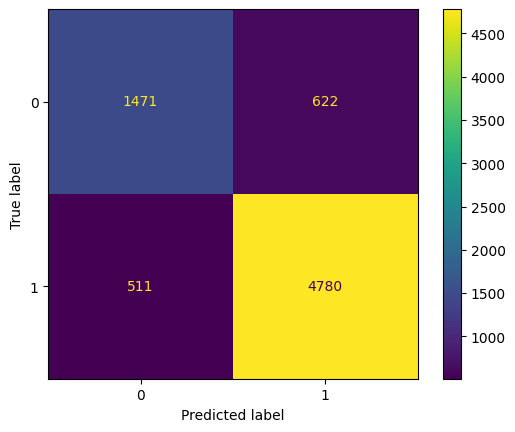

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model_rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=10,         
    random_state=42
)

# Huấn luyện mô hình
model_rf.fit(X_train_resample, y_train_resample)

# Dự đoán
y_pred_rf = model_rf.predict(X_test)

# In báo cáo
print(classification_report(y_test, y_pred_rf))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2093
           1       0.88      0.90      0.89      5291

    accuracy                           0.85      7384
   macro avg       0.81      0.80      0.81      7384
weighted avg       0.84      0.85      0.85      7384



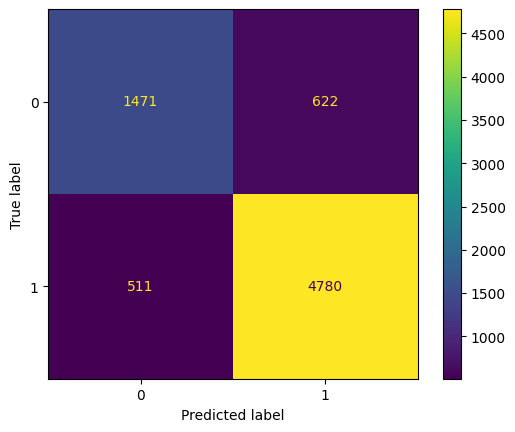

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Xây dựng mô hình Neural Network bằng Keras
keras_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile mô hình
keras_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Huấn luyện mô hình
keras_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)

# Dự đoán xác suất và phân loại
y_pred_prob_keras = keras_model.predict(X_test)
y_pred_keras = (y_pred_prob_keras >= 0.5).astype(int)

# Báo cáo kết quả
report_keras = classification_report(y_test, y_pred_keras, output_dict=True)
conf_matrix_keras = confusion_matrix(y_test, y_pred_keras)

# Hiển thị kết quả
y_pred_keras = model_rf.predict(X_test)

print(classification_report(y_test, y_pred_keras))

ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)



              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2093
           1       0.88      0.91      0.89      5291

    accuracy                           0.85      7384
   macro avg       0.81      0.80      0.81      7384
weighted avg       0.84      0.85      0.84      7384



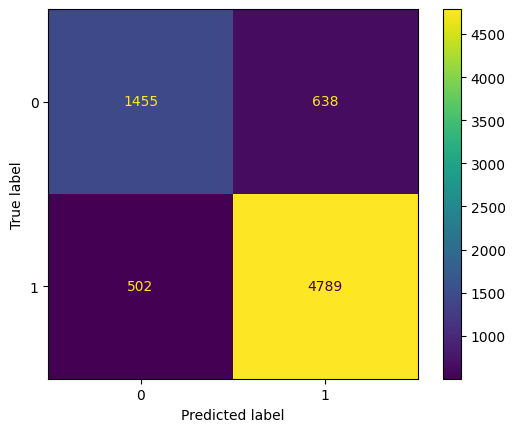

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Khởi tạo mô hình Neural Network (MLP)
model_nn = MLPClassifier(
    hidden_layer_sizes=(( 64, 32)),  
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=1000,
    random_state=42
)

# Huấn luyện mô hình
model_nn.fit(X_train_resample, y_train_resample)

# Dự đoán
y_pred_nn = model_nn.predict(X_test)

# In báo cáo kết quả
print(classification_report(y_test, y_pred_nn))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_nn, X_test, y_test)


              precision    recall  f1-score   support

           0       0.53      0.55      0.54      2093
           1       0.82      0.81      0.81      5291

    accuracy                           0.74      7384
   macro avg       0.68      0.68      0.68      7384
weighted avg       0.74      0.74      0.74      7384



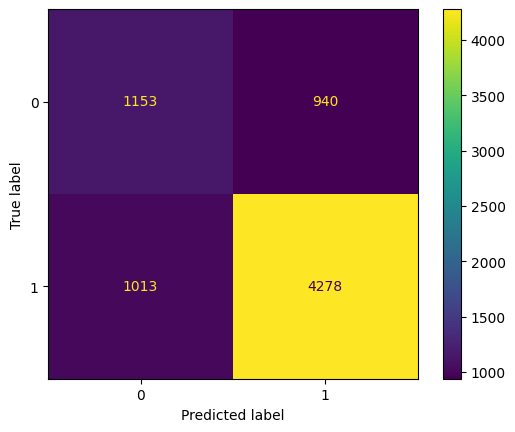

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Khởi tạo mô hình cây quyết định
model_dt = DecisionTreeClassifier(
    criterion='entropy',         
    max_depth=None,           
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Huấn luyện mô hình
model_dt.fit(X_train_resample, y_train_resample)

# Dự đoán
y_pred_dt = model_dt.predict(X_test)

# In báo cáo
print(classification_report(y_test, y_pred_dt))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test)


              precision    recall  f1-score   support

           0       0.71      0.61      0.66      2093
           1       0.85      0.90      0.88      5291

    accuracy                           0.82      7384
   macro avg       0.78      0.76      0.77      7384
weighted avg       0.81      0.82      0.82      7384



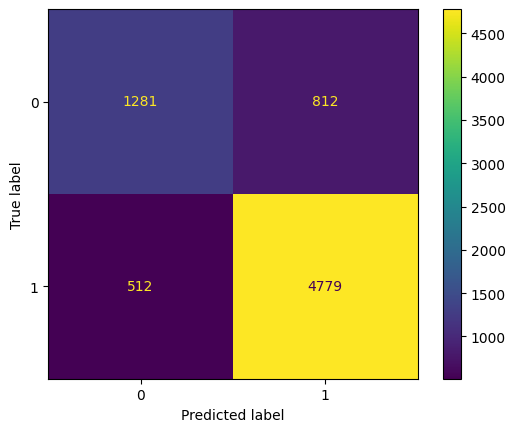

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Khởi tạo mô hình SVM
model_svm = SVC(
    kernel='rbf',        
    C=1.0,               
    gamma='scale',       
    probability=True,    
    random_state=42
)

# Huấn luyện mô hình
model_svm.fit(X_train_resample, y_train_resample)

# Dự đoán
y_pred_svm = model_svm.predict(X_test)

# In báo cáo kết quả
print(classification_report(y_test, y_pred_svm))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test)


              precision    recall  f1-score   support

           0       0.74      0.54      0.63      2093
           1       0.84      0.92      0.88      5291

    accuracy                           0.82      7384
   macro avg       0.79      0.73      0.75      7384
weighted avg       0.81      0.82      0.81      7384



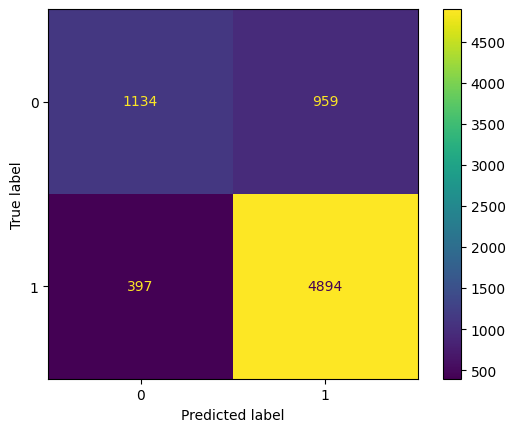

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Khởi tạo mô hình SVM với kernel tuyến tính
model_svml = SVC(
    kernel='linear',        
    C=1.0,               
    gamma='scale',       
    probability=True,    
    random_state=42
)

# Huấn luyện mô hình
model_svml.fit(X_train_resample, y_train_resample)

# Dự đoán
y_pred_svml = model_svml.predict(X_test)

# In báo cáo kết quả
print(classification_report(y_test, y_pred_svml))

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(model_svml, X_test, y_test)


C:\Users\nguye\AppData\Local\Temp\ipykernel_19632\2903856717.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results, ax=axes[0], palette="Blues_d")
C:\Users\nguye\AppData\Local\Temp\ipykernel_19632\2903856717.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1 Score", y="Model", data=results, ax=axes[1], palette="Greens_d")


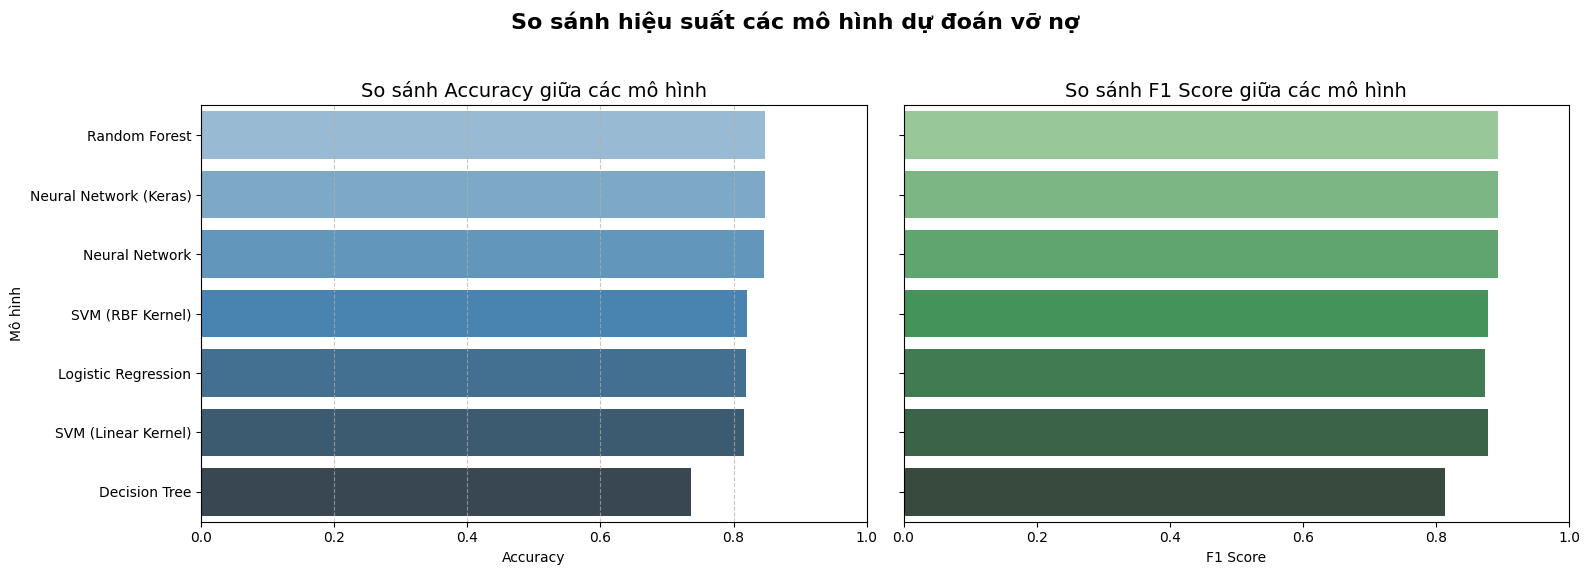

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Tập hợp các mô hình
models = {
    "Logistic Regression": model_log,
    "Random Forest": model_rf,
    "Neural Network": model_nn,
    "Decision Tree": model_dt,
    "SVM (RBF Kernel)": model_svm,
    "SVM (Linear Kernel)": model_svml,
    "Neural Network (Keras)": keras_model
}

# Tính toán các chỉ số đánh giá mô hình
results_list = [
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "F1 Score": f1_score(y_test, y_pred_log.flatten()),
        "Precision": precision_score(y_test, y_pred_log.flatten()),
        "Recall": recall_score(y_test, y_pred_log.flatten())
    },
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, y_pred_rf.flatten()),
        "F1 Score": f1_score(y_test, y_pred_rf.flatten()),
        "Precision": precision_score(y_test, y_pred_rf.flatten()),
        "Recall": recall_score(y_test, y_pred_rf.flatten())
    },
    {
        "Model": "Neural Network",
        "Accuracy": accuracy_score(y_test, y_pred_nn.flatten()),
        "F1 Score": f1_score(y_test, y_pred_nn.flatten()),
        "Precision": precision_score(y_test, y_pred_nn.flatten()),
        "Recall": recall_score(y_test, y_pred_nn.flatten())
    },
    {
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred_dt.flatten()),
        "F1 Score": f1_score(y_test, y_pred_dt.flatten()),
        "Precision": precision_score(y_test, y_pred_dt.flatten()),
        "Recall": recall_score(y_test, y_pred_dt.flatten())
    },
    {
        "Model": "SVM (RBF Kernel)",
        "Accuracy": accuracy_score(y_test, y_pred_svm.flatten()),
        "F1 Score": f1_score(y_test, y_pred_svm.flatten()),
        "Precision": precision_score(y_test, y_pred_svm.flatten()),
        "Recall": recall_score(y_test, y_pred_svm.flatten())
    },
    {
        "Model": "SVM (Linear Kernel)",
        "Accuracy": accuracy_score(y_test, y_pred_svml.flatten()),
        "F1 Score": f1_score(y_test, y_pred_svml.flatten()),
        "Precision": precision_score(y_test, y_pred_svml.flatten()),
        "Recall": recall_score(y_test, y_pred_svml.flatten())
    },
    {
        "Model": "Neural Network (Keras)",
        "Accuracy": accuracy_score(y_test, y_pred_keras.flatten()),
        "F1 Score": f1_score(y_test, y_pred_keras.flatten()),
        "Precision": precision_score(y_test, y_pred_keras.flatten()),
        "Recall": recall_score(y_test, y_pred_keras.flatten())
    }
]

# Tạo DataFrame và vẽ biểu đồ như trước
results = pd.DataFrame(results_list).sort_values(by="Accuracy", ascending=False)

# Vẽ biểu đồ song song
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Accuracy
sns.barplot(x="Accuracy", y="Model", data=results, ax=axes[0], palette="Blues_d")
axes[0].set_title("So sánh Accuracy giữa các mô hình", fontsize=14)
axes[0].set_xlim(0, 1)
axes[0].set_xlabel("Accuracy")
axes[0].set_ylabel("Mô hình")
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# F1 Score
sns.barplot(x="F1 Score", y="Model", data=results, ax=axes[1], palette="Greens_d")
axes[1].set_title("So sánh F1 Score giữa các mô hình", fontsize=14)
axes[1].set_xlim(0, 1)
axes[1].set_xlabel("F1 Score")
axes[1].set_ylabel("")

# Tiêu đề chung
plt.suptitle("So sánh hiệu suất các mô hình dự đoán vỡ nợ", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
